# **Data Minning Project**

In [ ]:
#decision tree visualization
!pip install dtreeviz

**Data loading**

In [ ]:
#imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats
from dtreeviz.trees import *
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import  StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [ ]:
df = pd.read_csv("dm.csv")

In [ ]:
df.head()

,first_name,Age,SystolicBP,DiastolicBP,BS,date,BodyTemp,HeartRate,BPS,RiskLevel
0,Grange Cleen,19,120.0,80.0,19.0,7/31/2020,98.0,70,149.7,mid risk
1,Elysee Smylie,40,160.0,100.0,18.0,5/12/2020,98.0,77,148.4,high risk
2,Ileana Fontel,32,140.0,90.0,18.0,7/15/2020,98.0,88,149.4,high risk
3,Perry Addicote,55,140.0,95.0,19.0,12/9/2019,98.0,77,133.7,high risk
4,Worthy Vaissiere,40,140.0,100.0,18.0,4/7/2020,98.0,90,129.4,high risk


Data cleaning:

1.   missing handling
2.   remove noise
3.   duplicate records



In [ ]:
##detect the number of missing values 
df.isnull().sum()

first_name     0
Age            0
SystolicBP     1
DiastolicBP    1
BS             1
date           0
BodyTemp       2
HeartRate      0
BPS            0
RiskLevel      0
dtype: int64

In [ ]:
##filling the missing value with mean
##"inplace=True" to modify and save the changes done for the wanted data in the chosen df, default is False
df['SystolicBP'].fillna(int(df['SystolicBP'].mean()), inplace=True)
df['DiastolicBP'].fillna(int(df['DiastolicBP'].mean()), inplace=True)
df['BS'].fillna(int(df['BS'].mean()), inplace=True)
df['BodyTemp'].fillna(int(df['BodyTemp'].mean()), inplace=True)
df

,first_name,Age,SystolicBP,DiastolicBP,BS,date,BodyTemp,HeartRate,BPS,RiskLevel
0,Grange Cleen,19,120.0,80.0,19.0,7/31/2020,98.0,70,149.70,mid risk
1,Elysee Smylie,40,160.0,100.0,18.0,5/12/2020,98.0,77,148.40,high risk
2,Ileana Fontel,32,140.0,90.0,18.0,7/15/2020,98.0,88,149.40,high risk
3,Perry Addicote,55,140.0,95.0,19.0,12/9/2019,98.0,77,133.70,high risk
4,Worthy Vaissiere,40,140.0,100.0,18.0,4/7/2020,98.0,90,129.40,high risk
...,...,...,...,...,...,...,...,...,...,...
1025,Meggy Carcas,35,120.0,80.0,6.9,11/9/2019,98.0,78,72.57,mid risk
1026,Elinore Fisby,12,120.0,95.0,6.9,5/11/2020,98.0,60,79.57,low risk
1027,Dee Gunderson,31,120.0,60.0,6.1,11/28/2019,98.0,76,62.33,mid risk
1028,Andy Bech,35,120.0,60.0,6.1,1/12/2020,98.0,76,74.33,low risk


In [ ]:
##Detecting outliers
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BPS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,29.991262,113.141748,76.429126,8.821505,98.285825,74.203883,89.087568
std,13.417093,18.340302,13.883184,3.429944,8.769676,8.661162,19.745952
min,10.000000,70.000000,49.000000,6.000000,-98.000000,2.000000,49.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,75.570000
50%,27.000000,120.000000,80.000000,7.500000,98.000000,76.000000,84.330000
75%,40.000000,120.000000,90.000000,8.000000,98.000000,80.000000,93.340000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,155.700000


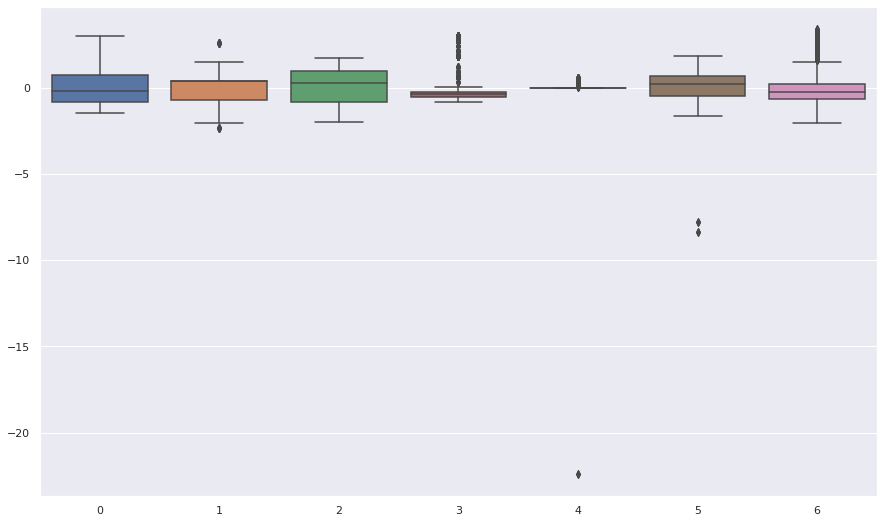

In [ ]:
#representing the range and outliers to see by eye to check for further possible actions
adj = StandardScaler()
d_scaled = adj.fit_transform(df[["Age","SystolicBP",   "DiastolicBP",  "BS"    ,"BodyTemp", "HeartRate", "BPS"]])
sns.set(rc={'figure.figsize':(15,9)})
sns.boxplot(data=d_scaled)

In [ ]:
#eleminating the outliers presented in the previous boxplots using zscore of 3 or more "all(axis=1)" satisfy the constraint for all coulmns while the default=0 that computes the whole data rows.
df = df[(np.abs(stats.zscore(df[["SystolicBP" ,"DiastolicBP" , "BS" , "BodyTemp", "HeartRate", "BPS"]])) < 3).all(axis=1)]

In [ ]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BPS
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000
mean,29.858135,112.922619,76.320437,8.662946,98.680952,74.389881,88.098735
std,13.395619,18.060858,13.812746,3.217368,1.381634,7.475599,18.273543
min,10.000000,70.000000,49.000000,6.000000,98.000000,60.000000,49.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,75.385000
50%,26.500000,120.000000,80.000000,7.500000,98.000000,76.000000,84.100000
75%,38.250000,120.000000,90.000000,8.000000,98.000000,80.000000,92.750000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,147.400000


In [ ]:
#drop duplicate records
df.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Data cleaning (irrelevant attributes, correlated attributes)

1.   irrelevant attributes
2.   correlated attributes


In [ ]:
#Correlated attributes are usually removed because they are similar in behavior
# in prediction calculations,so keeping attributes with similar impacts is redundant.
#Removing correlated attributes saves space and time of calculation of complex algorithms.
#Moreover, it also makes processes easier to design, analyze, understand and comprehend.

In [ ]:
#irrelevant attribute
# drop to remove column
# column_name – Name of the column to be deleted
# axis=1 – Specifies the axis to be deleted. Axis 1 means column and 0 means rows.
# inplace=true specifies the drop operation to be in same dataframe rather creating a copy of the dataframe after drop.
df.drop("first_name", axis=1, inplace=True)
df.drop("date", axis=1, inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BPS,RiskLevel
3,55,140.0,95.0,19.0,98.0,77,133.7,high risk
4,40,140.0,100.0,18.0,98.0,90,129.4,high risk
5,55,140.0,95.0,19.0,98.0,77,135.7,high risk
6,42,140.0,100.0,18.0,98.0,90,128.4,high risk
7,50,130.0,100.0,16.0,98.0,75,130.8,mid risk


In [ ]:
#correlated attributes
# Create correlation matrix
cor_matrix = df.corr().abs()
cor_matrix

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BPS
Age,1.000000,0.408410,0.390869,0.467103,0.252150,0.057464,0.440110
SystolicBP,0.408410,1.000000,0.777529,0.385091,0.277262,0.037383,0.369904
DiastolicBP,0.390869,0.777529,1.000000,0.413283,0.259882,0.071435,0.398179
BS,0.467103,0.385091,0.413283,1.000000,0.110127,0.117833,0.909689
BodyTemp,0.252150,0.277262,0.259882,0.110127,1.000000,0.102279,0.147639
HeartRate,0.057464,0.037383,0.071435,0.117833,0.102279,1.000000,0.088566
BPS,0.440110,0.369904,0.398179,0.909689,0.147639,0.088566,1.000000


In [ ]:
# Select upper triangle of correlation matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
upper_tri

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BPS
Age,NaN,0.40841,0.390869,0.467103,0.252150,0.057464,0.440110
SystolicBP,NaN,NaN,0.777529,0.385091,0.277262,0.037383,0.369904
DiastolicBP,NaN,NaN,NaN,0.413283,0.259882,0.071435,0.398179
BS,NaN,NaN,NaN,NaN,0.110127,0.117833,0.909689
BodyTemp,NaN,NaN,NaN,NaN,NaN,0.102279,0.147639
HeartRate,NaN,NaN,NaN,NaN,NaN,NaN,0.088566
BPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Find index of feature columns with correlation greater than or equal 0.8
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.8)]
to_drop

['BPS']

In [ ]:
# Now we are droping the columns which are in the list 'to_drop' from the dataframe
df.drop(to_drop, axis=1, inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
3,55,140.0,95.0,19.0,98.0,77,high risk
4,40,140.0,100.0,18.0,98.0,90,high risk
5,55,140.0,95.0,19.0,98.0,77,high risk
6,42,140.0,100.0,18.0,98.0,90,high risk
7,50,130.0,100.0,16.0,98.0,75,mid risk


Data cleaning:
1.   discretization 


In [ ]:
#discretization refers to the process of converting or partitioning continuous attributes, features or variables
#to discretized or nominal attributes/features/variables/intervals.

In [ ]:
##define a new dataframe
dd = pd.DataFrame()

In [ ]:
#using it as a reference
df['Age'].min(), df['Age'].max()

(10, 70)

In [ ]:
#The uses of "qcut" (Quantile-based discretization function) for a result that has equal distribution of the items in bins.
#q represent the quantiles as the number of bins so it must always be the same number of labels as the shown values with 1 edge higher
dd['Age_bin'] = pd.qcut(df['Age'], q=[0, .20, .40, .60, .80, 1.00], labels=['Teenager ', 'Young Adults', ' Adults',
                                                                     'Middle-aged Adults', 'Old Adults'])
dd

,Age_bin
3,Old Adults
4,Middle-aged Adults
5,Old Adults
6,Middle-aged Adults
7,Old Adults
...,...
1025,Middle-aged Adults
1026,Teenager
1027,Middle-aged Adults
1028,Middle-aged Adults


In [ ]:
df['BodyTemp'].min(), df['BodyTemp'].max()

(98.0, 103.0)

In [ ]:
#in "cut" the bins must be dfined by the user by being familiar with data and deciding the groups and edges as it seems fit.
#"duplicates" If bin edges are not unique, raise ValueError or drop non-uniques.
dd['BodyTemp_bin'] = pd.cut(df['BodyTemp'], bins=[85,97,100,110], labels=['Low', 'Normal', 'High'],
                               duplicates= 'drop')
dd

,Age_bin,BodyTemp_bin
3,Old Adults,Normal
4,Middle-aged Adults,Normal
5,Old Adults,Normal
6,Middle-aged Adults,Normal
7,Old Adults,Normal
...,...,...
1025,Middle-aged Adults,Normal
1026,Teenager,Normal
1027,Middle-aged Adults,Normal
1028,Middle-aged Adults,Normal


In [ ]:
df['HeartRate'].min(), df['HeartRate'].max()

(60, 90)

In [ ]:
dd['HeartRate_bin'] = pd.cut(df['HeartRate'], bins=[40,60,80,100], labels=['Low', 'Normal', 'High'])
dd

,Age_bin,BodyTemp_bin,HeartRate_bin
3,Old Adults,Normal,Normal
4,Middle-aged Adults,Normal,High
5,Old Adults,Normal,Normal
6,Middle-aged Adults,Normal,High
7,Old Adults,Normal,Normal
...,...,...,...
1025,Middle-aged Adults,Normal,Normal
1026,Teenager,Normal,Low
1027,Middle-aged Adults,Normal,Normal
1028,Middle-aged Adults,Normal,Normal


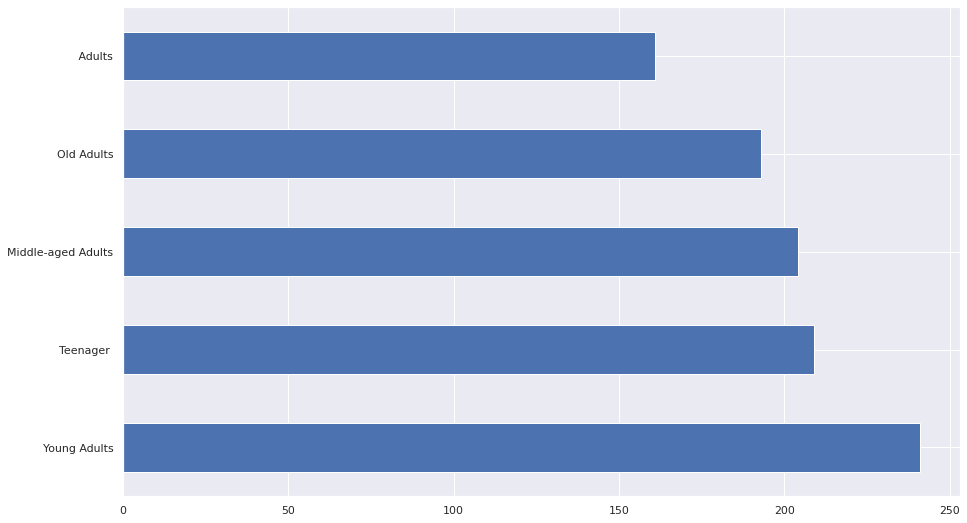

In [ ]:
#"kind" represent the chosen bar plot with a defualt of "line" while "barh" is horizontal bar plot
dd['Age_bin'].value_counts().plot(kind='barh')
plt.show()

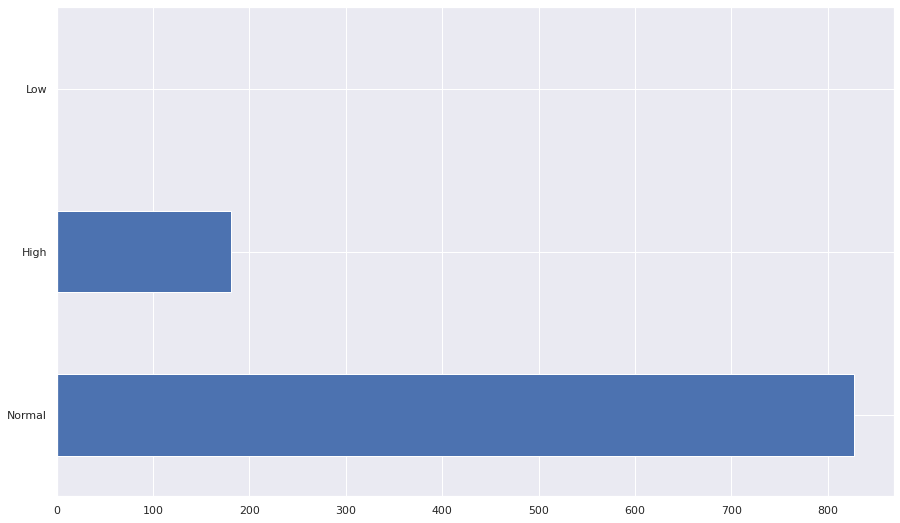

In [ ]:
dd['BodyTemp_bin'].value_counts().plot(kind='barh')
plt.show()

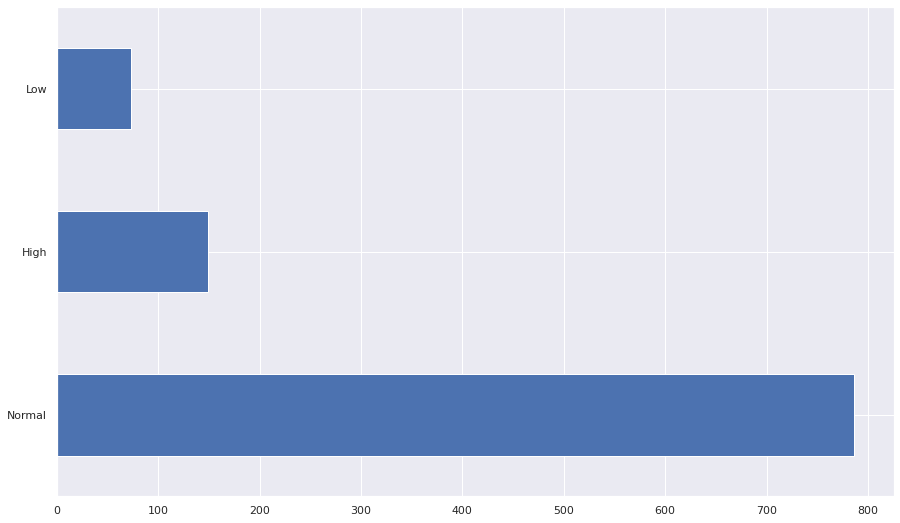

In [ ]:
dd['HeartRate_bin'].value_counts().plot(kind='barh')
plt.show()

In [ ]:
dd.head()

,Age_bin,BodyTemp_bin,HeartRate_bin
3,Old Adults,Normal,Normal
4,Middle-aged Adults,Normal,High
5,Old Adults,Normal,Normal
6,Middle-aged Adults,Normal,High
7,Old Adults,Normal,Normal


KNN


1.   split data 
2.   apply algorithm
3.   accuracy check (confusion matrix prefered)

In [ ]:
#Split the data into 80% train and 20% test subsets. "shuffle = True" shuffles the data before applying the split, with a default=zero nothing would change.
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, shuffle=True)

In [ ]:
#choosing the most suitable number of K
K = math.sqrt(len(df))
K= round(K)
K

32

In [ ]:
#Standardize features by removing the mean and scaling to unit variance. The standard score of a sample x is calculated as: z = (x - u) / s
adj = StandardScaler()
#Fit to data, then transform it, equivalent to fit.transform but more efficient.
X_train = adj.fit_transform(X_train)
#Perform standardization by centering and scaling.
X_test  = adj.transform(X_test)
#Classifier implementing the k-nearest neighbors vote, with n_neighbors default=5.By choosing "manhattan" its distance would be used.
knn = KNeighborsClassifier(n_neighbors=15,metric="manhattan")
#Fit the k-nearest neighbors classifier from the training dataset.
knn.fit(X_train, y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=15)

In [ ]:
#Predict the class labels for the provided data.
y_pred = knn.predict(X_test)
y_pred
#To evaluate the result, we will use accuracy_score
print(accuracy_score(y_test,y_pred))

0.7029702970297029


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


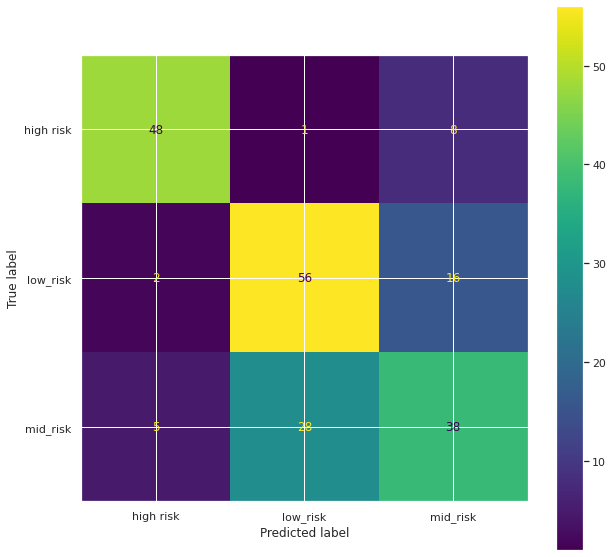

In [ ]:
#Create figure and set of subplots. "figsize=(width, height)"
fig, ax = plt.subplots(figsize=(10, 10))
#A funcution that evaluates classification accuracy by computing the confusion matrix with each row corresponding to the true class.
plot_confusion_matrix(knn, X_test, y_test, display_labels=["high risk" , 'low_risk', 'mid_risk'], ax=ax)
plt.show()

Decision Tree
 
1.   apply algorithm
2.   accuracy check (confusion matrix prefered)

In [ ]:
#A non-parametric supervised learning that predicts the value of a target variable by learning simple decision rules deduced from the data features.
# The deeper the tree, the more complex the decision rules and the fitter the model.

In [ ]:
#Encode target labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
le.fit(y_test)
y_test = le.transform(y_test)
dtc = DecisionTreeClassifier(random_state = 0)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
dtc.score(X_test, y_test)

0.806930693069307

In [ ]:
#Evaluate a score by cross-validation."cv" determine the split strategy with a default of 5 fold, "scoring" represent the single wanted output.
dt_accuracy = np.mean(cross_val_score(dtc, X_train, y_train, cv=10, scoring='accuracy'))
print("Mean accuracy: ", dt_accuracy)

Mean accuracy:  0.8412345679012345


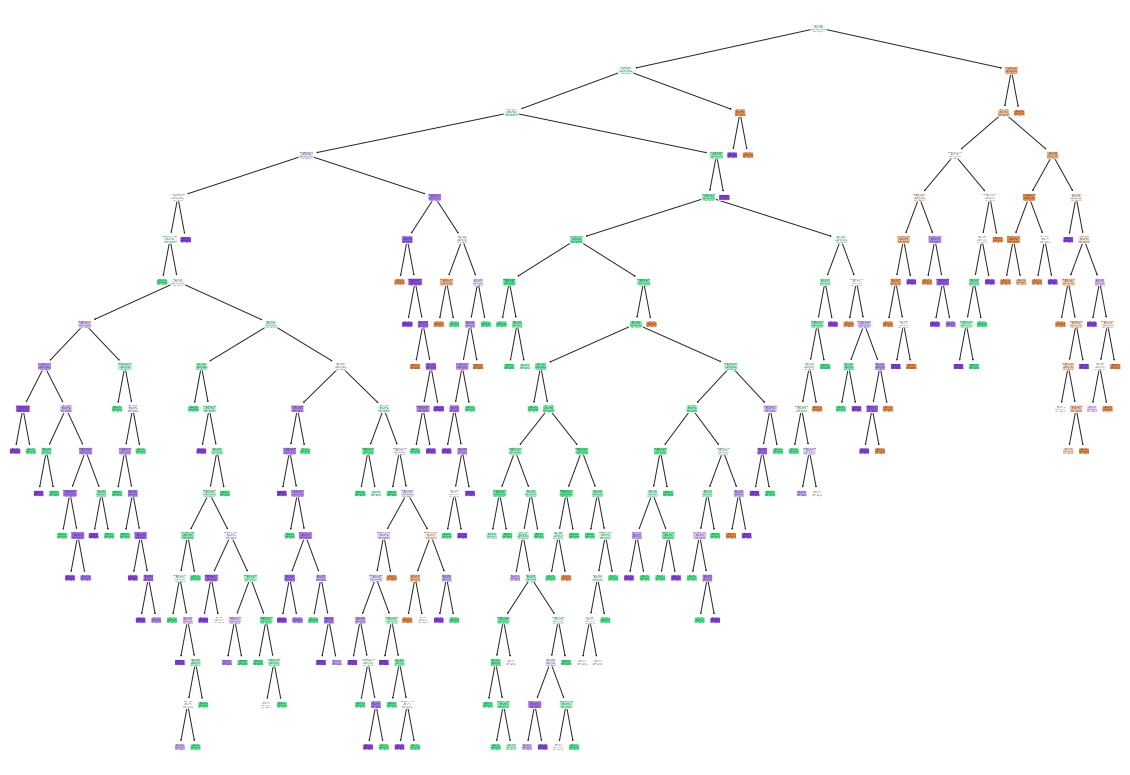

In [ ]:
fig = plt.figure(figsize=(20, 14))
#"filled"=True paint the nodes with a default of false, "rounded"=True draw node with rounded corners.
_ = plot_tree(dtc, filled=True, rounded=True, class_names=['high_risk', 'mid_risk', "low_risk"], feature_names=(df.columns)[:-1])
fig.savefig("decistion_tree.png")

In [ ]:
#vizaulizing the decision tree. "Classs_names" represent the low mid high risks.
viz = dtreeviz(dtc, X_train, y_train,
                target_name="Heart Risk",
                feature_names=['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'],
                class_names=['0', '1', '2'])
viz.save("decision_tree.svg")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
findfont: Fon

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


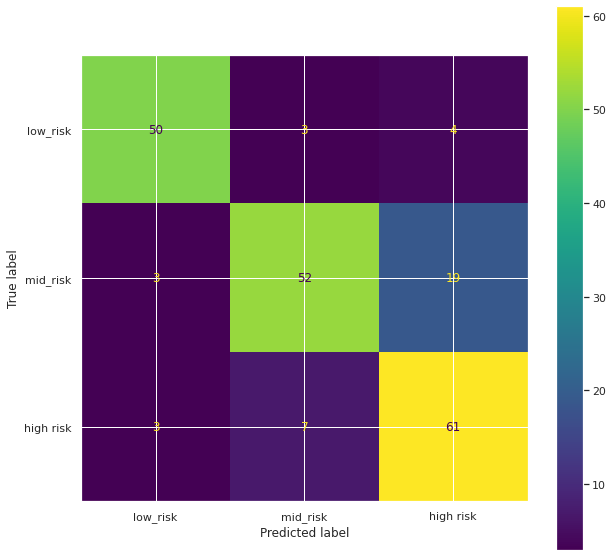

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(dtc, X_test, y_test, display_labels=['low_risk', 'mid_risk', "high risk"], ax=ax)
plt.show()

Naive Bayes

In [ ]:
#The likelihood of the features is assumed to be Gaussian with parameters estimated using maximum likelihood.
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
dt_accuracy = np.mean(cross_val_score(dtc, X_train, y_train, cv=10, scoring='accuracy'))
print("Mean accuracy: ", dt_accuracy)

Mean accuracy:  0.8412345679012345


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


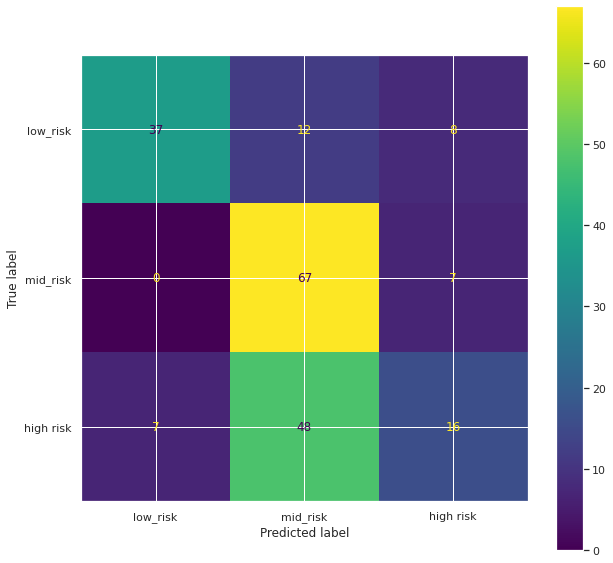

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(gnb, X_test, y_test, display_labels=['low_risk', 'mid_risk', "high risk"], ax=ax)
plt.show()

Kmeans

In [ ]:
df_c = pd.read_csv("Country-data.csv")
df_c.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df_c.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


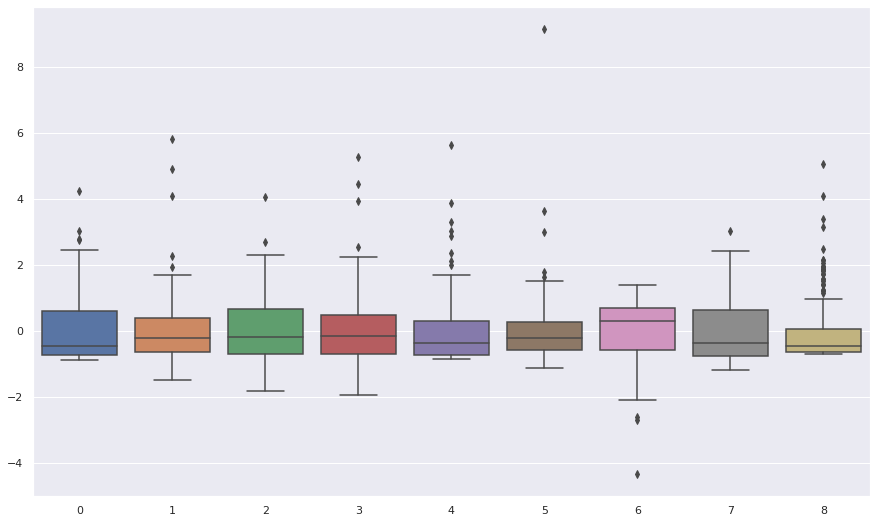

In [ ]:
adj = StandardScaler()
d_scaled = adj.fit_transform(df_c[["child_mort",	"exports",	"health", "imports",	"income", "inflation",	"life_expec", "total_fer",	"gdpp"]])
sns.set(rc={'figure.figsize':(15,9)})
sns.boxplot(data=d_scaled)

In [ ]:
#eleminating the outliers presented in the previous boxplots using zscore of 3 or more "all(axis=1)" satisfy the constraint for all coulmns while the default=0 that computes the whole data rows.
df_c = df_c[(np.abs(stats.zscore(df_c[["child_mort",	"exports",	"health", "imports",	"income", "inflation",	"life_expec", "total_fer",	"gdpp"]])) < 3).all(axis=1)]

In [ ]:
df_c.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,37.224183,38.670582,6.774706,45.735725,14365.222222,7.024150,70.457516,2.956340,10589.379085
std,36.358238,20.352828,2.539936,19.143349,13406.165312,6.949213,8.229230,1.477622,13945.393875
min,2.600000,0.109000,1.970000,0.065900,609.000000,-4.210000,46.500000,1.230000,231.000000
25%,8.700000,23.800000,4.970000,30.900000,3340.000000,1.770000,65.300000,1.800000,1310.000000
50%,20.300000,35.000000,6.320000,43.300000,9920.000000,5.140000,72.500000,2.480000,4540.000000
75%,62.000000,50.600000,8.500000,58.600000,20400.000000,10.100000,76.500000,3.910000,12100.000000
max,150.000000,103.000000,14.200000,108.000000,57600.000000,39.200000,82.800000,6.590000,58000.000000


In [ ]:
df_c.drop_duplicates(inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
#correlated attributes
# Create correlation matrix
cor_matrix = df_c.corr().abs()
cor_matrix

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,0.292012,0.284920,0.115421,0.616987,0.291671,0.870294,0.887719,0.524979
exports,0.292012,1.000000,0.091612,0.601012,0.426994,0.067629,0.237220,0.284961,0.271026
health,0.284920,0.091612,1.000000,0.162576,0.312409,0.341229,0.271964,0.228688,0.466815
imports,0.115421,0.601012,0.162576,1.000000,0.007693,0.231058,0.020562,0.105601,0.043599
income,0.616987,0.426994,0.312409,0.007693,1.000000,0.241964,0.693767,0.571882,0.915745
inflation,0.291671,0.067629,0.341229,0.231058,0.241964,1.000000,0.312152,0.354268,0.346857
life_expec,0.870294,0.237220,0.271964,0.020562,0.693767,0.312152,1.000000,0.788974,0.639576
total_fer,0.887719,0.284961,0.228688,0.105601,0.571882,0.354268,0.788974,1.000000,0.473660
gdpp,0.524979,0.271026,0.466815,0.043599,0.915745,0.346857,0.639576,0.473660,1.000000


In [ ]:
# Select upper triangle of correlation matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
upper_tri

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,NaN,0.292012,0.284920,0.115421,0.616987,0.291671,0.870294,0.887719,0.524979
exports,NaN,NaN,0.091612,0.601012,0.426994,0.067629,0.237220,0.284961,0.271026
health,NaN,NaN,NaN,0.162576,0.312409,0.341229,0.271964,0.228688,0.466815
imports,NaN,NaN,NaN,NaN,0.007693,0.231058,0.020562,0.105601,0.043599
income,NaN,NaN,NaN,NaN,NaN,0.241964,0.693767,0.571882,0.915745
inflation,NaN,NaN,NaN,NaN,NaN,NaN,0.312152,0.354268,0.346857
life_expec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.788974,0.639576
total_fer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.473660
gdpp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Find index of feature columns with correlation greater than or equal 0.8
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.8)]
to_drop

['life_expec', 'total_fer', 'gdpp']

In [ ]:
# Now we are droping the columns which are in the list 'to_drop' from the dataframe
df_c.drop(to_drop, axis=1, inplace=True)
df_c.head()

,country,child_mort,exports,health,imports,income,inflation
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44
1,Albania,16.6,28.0,6.55,48.6,9930,4.49
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10
3,Angola,119.0,62.3,2.85,42.9,5900,22.40
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44


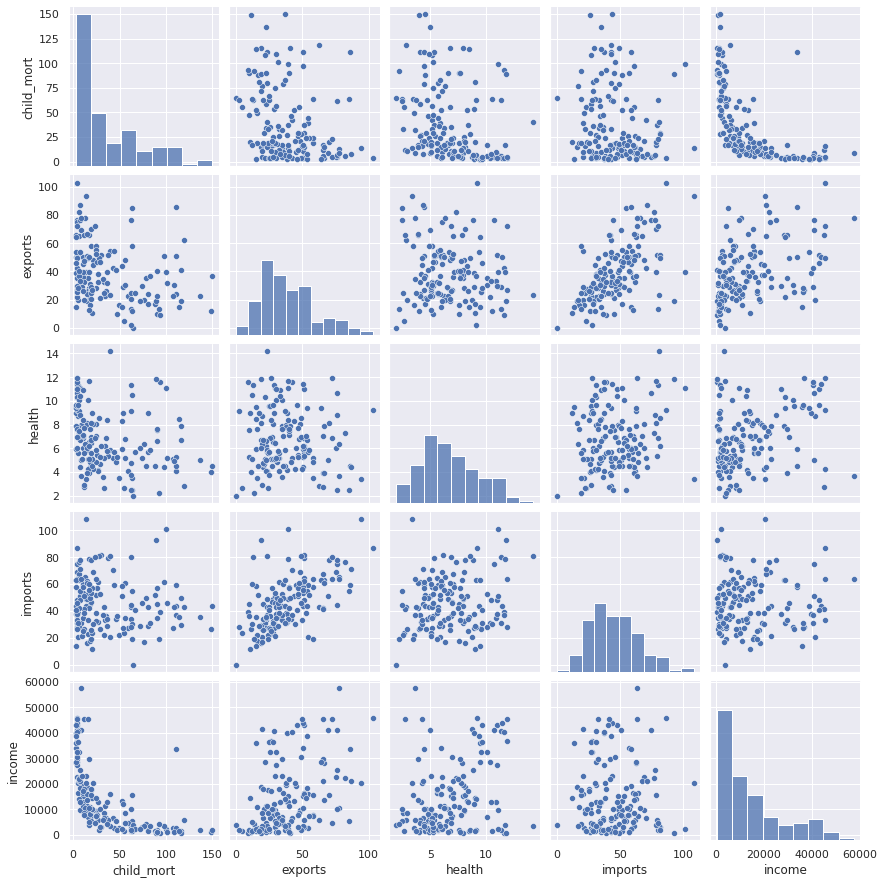

In [ ]:
#A pairplot plot a pairwise relationships creates a grid of Axes each variable in data will by shared in the y-axis across a single row
#and in the x-axis across a single column. Visualize the correlation your data and identify variables for further analysis
sns.pairplot(df_c.iloc[:,1:-1])

In [ ]:
#preprocissing for data to get the best centers
#Transform features by scaling each feature of range 0:1.
scaler = MinMaxScaler()
scaler.fit(df_c.iloc[:,1:-1])
df_c.iloc[:,1:-1]= scaler.transform(df_c.iloc[:,1:-1])
scaler.fit(df_c.iloc[:,1:-1])
df_c.iloc[:,1:-1] = scaler.transform(df_c.iloc[:,1:-1])
df_c.head()

,country,child_mort,exports,health,imports,income,inflation
0,Afghanistan,0.594301,0.096131,0.458708,0.415384,0.017564,9.44
1,Albania,0.094980,0.271073,0.374489,0.449664,0.163552,4.49
2,Algeria,0.167571,0.372151,0.179886,0.290308,0.215666,16.10
3,Angola,0.789688,0.604436,0.071954,0.396854,0.092839,22.40
4,Antigua and Barbuda,0.052239,0.441156,0.331971,0.545093,0.324455,1.44


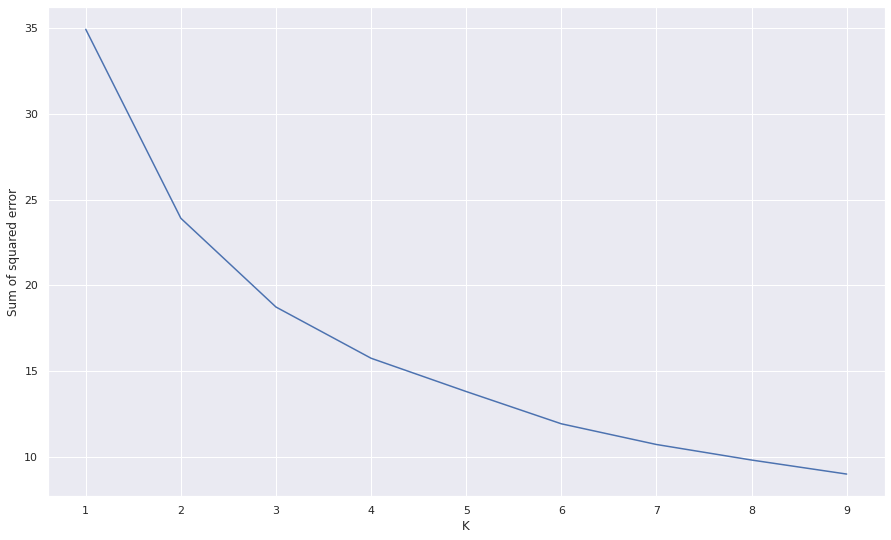

In [ ]:
#Determine optimal cluster k number with elbow method.
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_c.iloc[:,1:-1])
    sse.append(km.inertia_)
#Show Elbow plot.
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
#The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance.
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_c.iloc[:,1:-1])
y_predicted
df_c['cluster']=y_predicted
df_c.head()

,country,child_mort,exports,health,imports,income,inflation,cluster
0,Afghanistan,0.594301,0.096131,0.458708,0.415384,0.017564,9.44,2
1,Albania,0.094980,0.271073,0.374489,0.449664,0.163552,4.49,0
2,Algeria,0.167571,0.372151,0.179886,0.290308,0.215666,16.10,0
3,Angola,0.789688,0.604436,0.071954,0.396854,0.092839,22.40,2
4,Antigua and Barbuda,0.052239,0.441156,0.331971,0.545093,0.324455,1.44,0


In [ ]:
#to get the centers
km.cluster_centers_

array([[0.14282094, 0.41598039, 0.36203686, 0.45236553, 0.20337242],
       [0.01738174, 0.46458237, 0.56522965, 0.4077165 , 0.65172964],
       [0.57515637, 0.22785894, 0.33334663, 0.37483667, 0.02805749]])

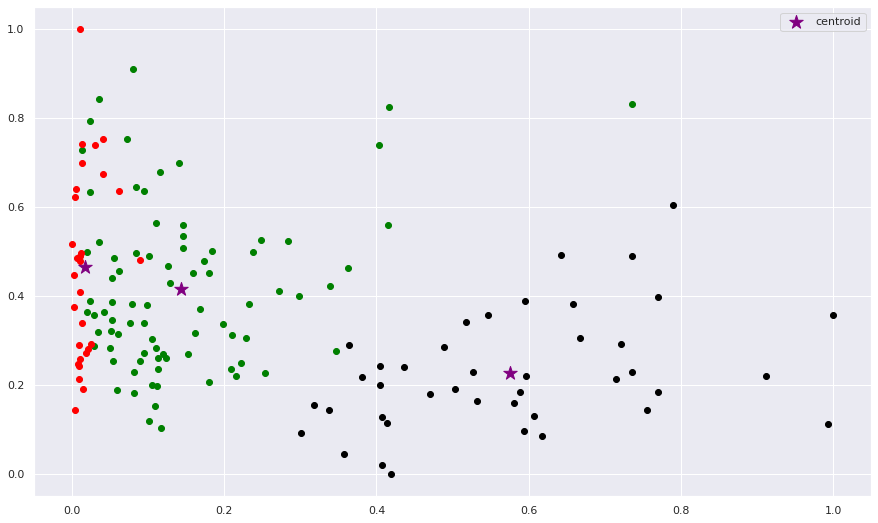

In [ ]:
#Visualising a few of the clusters.
df1 = df_c[df_c.cluster==0]
df2 = df_c[df_c.cluster==1]
df3 = df_c[df_c.cluster==2]
plt.scatter(df1["child_mort"],df1['exports'],color='green')
plt.scatter(df2["child_mort"],df2['exports'],color='red')
plt.scatter(df3["child_mort"],df3['exports'],color='black')
#Plot the clusters,"s" for centroid size, "color", "marker" are traits for centroids.
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=200,color='purple',marker='*',label='centroid')
plt.legend()